In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models

In [13]:
import pandas as pd
import numpy as np
import os
import requests
import keras
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
# SM_FRAMEWORK=keras
import segmentation_models as sm
from segmentation_models import Unet
sm.set_framework('keras')
keras.backend.set_image_data_format('channels_last')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
def adjust(img,mask):
  #normalization
  img = img / 255.

  #mask
  mask = mask / 255
  mask[mask > 0.5] = 1
  mask[mask <= 0.5] = 0

  return (img, mask)

def predict_scan(scan_image_path):
  """
  This function will take dataframe containing mask and scan image path and plot their images with their predicted mask images
  Note:- will only plot for top ten path according to index
  """
  model = Unet('resnet50', encoder_weights='', classes=2, activation='softmax', input_shape=(256,256,3),encoder_freeze=True)
  model.load_weights('/content/drive/MyDrive/BRAIN_MRI/unetmodel.h5')
  IMG_SIZE=(256,256)
  img = cv.imread(scan_image_path)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img = cv.resize(img ,IMG_SIZE)
  img = img / 255
  img = img[np.newaxis, :, :, :]
  pred=model.predict(img)
  img = np.squeeze(img)

  original = img.copy()
  print('Scans image')
  plt.imshow(original)
  plt.tight_layout()
  plt.axis('off')
  plt.savefig('scan.jpg')
  plt.show()
  
  main = original.copy()
  sample = np.array(np.squeeze(pred) > 0.5, dtype = np.uint8)
  contours, hier = cv2.findContours(sample[:,:,0],cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
  sample_over_pr = cv2.drawContours(main, contours, -1, [0,255,0], thickness=-1)
  print('Predicted overlap Mask image')
  plt.imshow(sample_over_pr)
  plt.tight_layout()
  plt.axis('off')
  plt.savefig('mask.jpg')
  plt.show()

Scans image


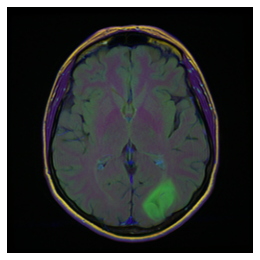

Predicted overlap Mask image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


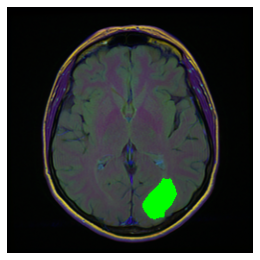

In [23]:
predict_scan("/content/TCGA_CS_6667_20011105_11.tif")